In [80]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.986320109439


In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV

In [76]:
def train_clf():
    X_train, Y_train = initialize_from_file('features_train.txt')
    X_resampled, Y_resampled = SMOTE().fit_sample(X_train, Y_train)
    X_test, Y_test = initialize_from_file('features_test.txt')


    clf = Perceptron()


    clf_isotonic = CalibratedClassifierCV(clf, cv=100, method='isotonic')

    clf_isotonic.fit(X_resampled, Y_resampled)

    preds = clf_isotonic.predict_proba(X_resampled)
    print(preds)
    clf.fit(X_resampled, Y_resampled)


    print("Training score: {}".format(clf_isotonic.score(X_train, Y_train)))
    print("Test score: {}".format(clf_isotonic.score(X_test, Y_test)))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    

def initialize_from_file(filename):
    X = []
    Y = []

    with open('training/{}'.format(filename)) as f:
        content = f.readlines()

    for i in content:
        i = i.replace('\n', '')
        i = i.split(',')
        X.append(i[0:-1])
        Y.append(i[-1])

    X = np.float_(X)
    return X,Y


train_clf()

[[ 0.6934049   0.3065951 ]
 [ 0.33411201  0.66588799]
 [ 0.07408333  0.92591667]
 ..., 
 [ 0.11020197  0.88979803]
 [ 0.83790068  0.16209932]
 [ 0.09063871  0.90936129]]
Training score: 0.757261410788
Test score: 0.777777777778


In [38]:
X = []
Y = []

        
with open('training/features.txt') as f:
    content = f.readlines()
    
for i in content:
    i = i.replace('\n', '')
    i = i.split(',')
    X.append(i[0:-1])
    Y.append(i[-1])

X = np.float_(X)

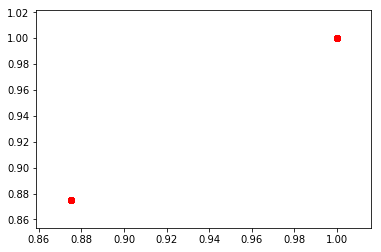

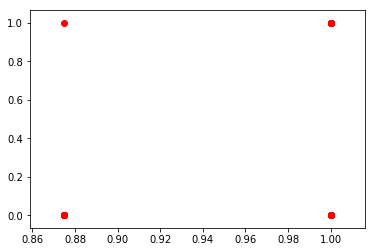

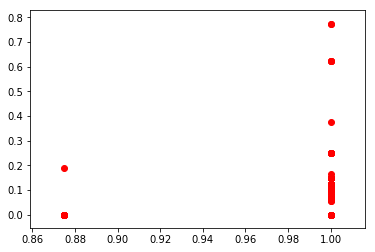

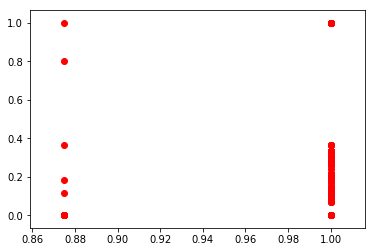

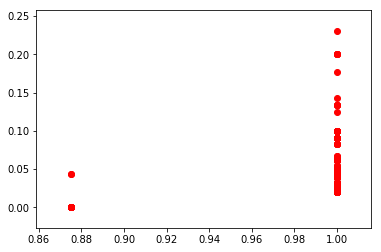

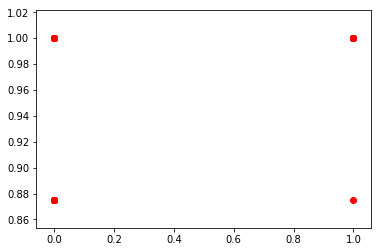

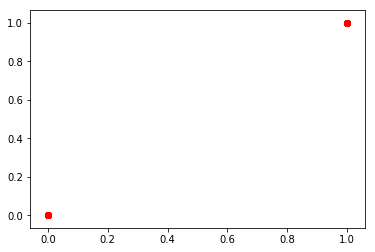

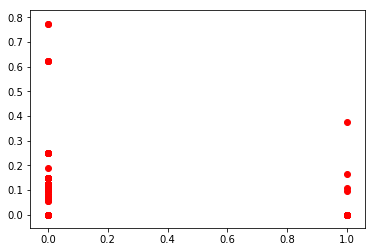

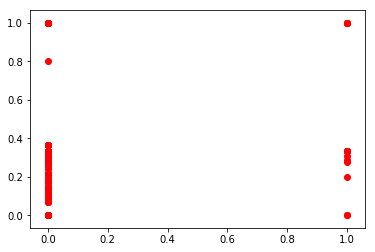

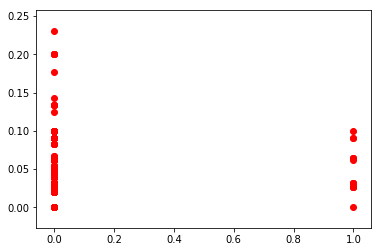

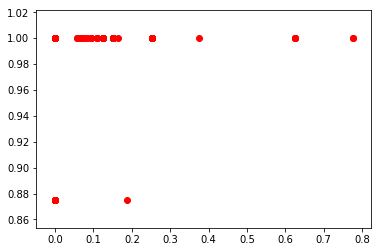

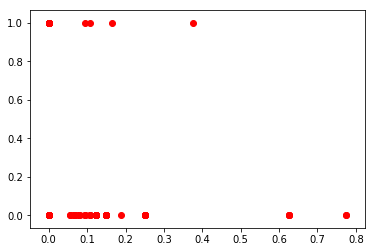

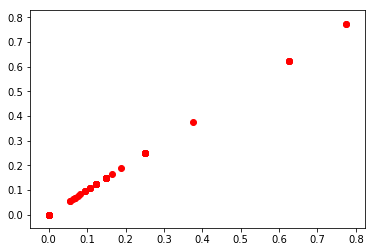

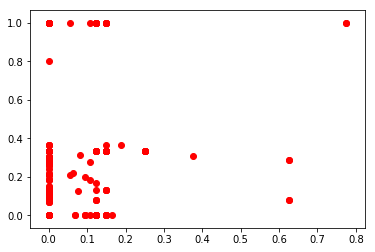

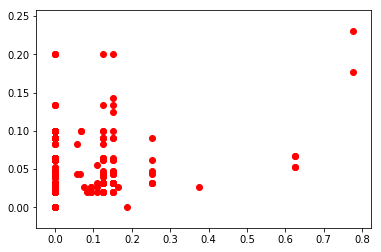

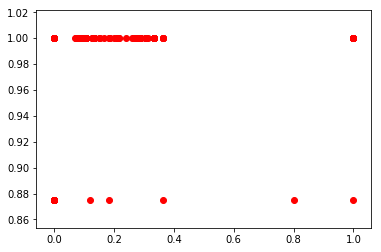

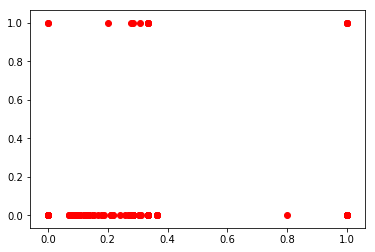

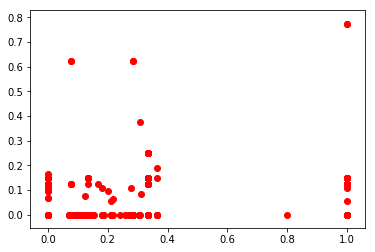

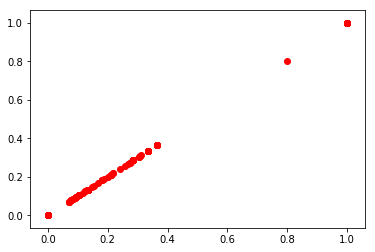

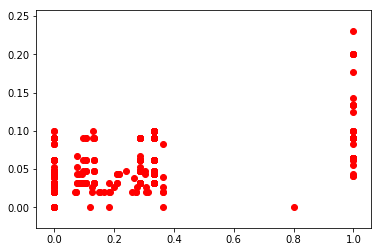

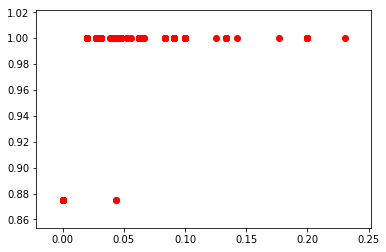

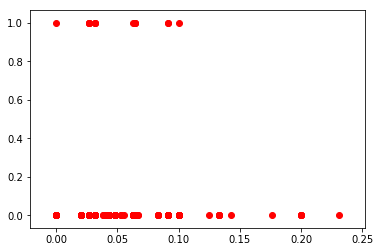

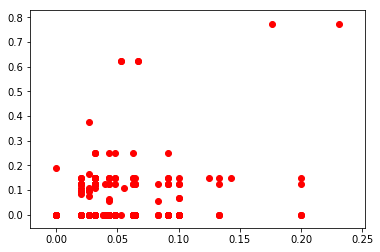

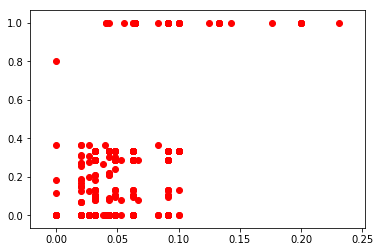

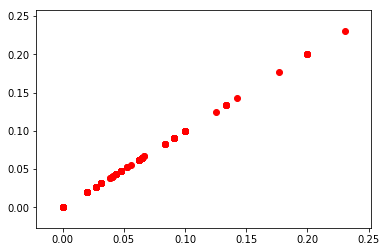

In [25]:
for i in range(0,len(X[0])):
    for j in range(0,len(X[0])):
        

        plt.scatter(X[:,i], X[:,j], c='r')        
        plt.show()


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [28]:
# classifiers = [
#     KNeighborsClassifier(3),
#     Perceptron(),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]



# for clf in classifiers:
#     clf.fit(X,Y)
#     print(clf.score(X,Y))


clf = SVC(kernel="linear", C=0.025)
clf.fit(X,Y)
clf.score(X,Y)

filename = '../disambiguation_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [81]:
print(clf.feature_importances_)

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [36]:
labels_prob = clf.predict_proba(X)
labels = clf.predict(X)

In [64]:
result = loaded_model.score(X, Y)
print(result)
print('-')
for l in range(0,len(labels)):
    
    if Y[l] == 'True':
        print('predicted: {}'.format(labels[l]))
        print('labeled: {}'.format(Y[l]))
        print(labels_prob[l])

0.979480164159
-
predicted: False
labeled: True
[ 0.79870175  0.20129825]
predicted: False
labeled: True
[  9.99494656e-01   5.05344070e-04]
predicted: True
labeled: True
[  1.60520139e-05   9.99983948e-01]
predicted: True
labeled: True
[  3.90513954e-06   9.99996095e-01]
predicted: True
labeled: True
[  2.82389557e-08   9.99999972e-01]
predicted: True
labeled: True
[ 0.22502651  0.77497349]
predicted: True
labeled: True
[  2.82389557e-08   9.99999972e-01]
predicted: True
labeled: True
[ 0.11594441  0.88405559]
predicted: True
labeled: True
[ 0.41030558  0.58969442]
predicted: False
labeled: True
[  9.99598947e-01   4.01052811e-04]


In [29]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [57]:
print(pca.explained_variance_ratio_)  

[  4.23500045e-01   3.19592497e-01   2.21816442e-01   3.47400970e-02
   3.50919439e-04]


[[-0.40112579 -0.04770749  0.33139606 -0.25182025  0.06250772]
 [-0.37125102  0.09593604  0.43762605 -0.23571469  0.05785215]
 [-0.4418261  -0.01696665  0.44309739 -0.23648079  0.06225615]
 ..., 
 [-0.04601638  0.03693669 -0.22408358 -0.08426292 -0.00770677]
 [-0.15653229 -0.13986148 -0.21551583 -0.08546258 -0.00081039]
 [-0.22191553 -0.18636685 -0.14466151 -0.07660792  0.00157791]]


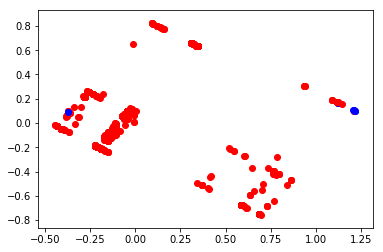

In [58]:
a = pca.transform(X)
print(a)

for i in range(0,len(a)):
    if Y[i] == 'True':
        y = 'b'
    else:
        y = 'r'
    
    plt.scatter(a[i,0], a[i,1], c = y)
plt.show()

In [21]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.98755186722
